# 1. Logistic regression

### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
buytest = pd.read_table('../r/business_analytics/buytest.txt', sep = ' ')
print('Buytest data shpe:', buytest.shape)

Buytest data shpe: (10000, 26)


### 결측치 확인 및 제거

In [2]:
print('number of missing value: \n', buytest.isnull().sum()[0:5])

buytest = buytest.dropna()

print(buytest.shape[0], 'samples')

number of missing value: 
 ID           0
RESPOND      0
AGE        234
INCOME     234
SEX        234
dtype: int64
9221 samples


In [3]:
buytest.head()

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,001371057,0,71.0,67.0,M,1.0,719.0,0.0,A,10,...,0,0,0,0,0,0,0,0,0,0
1,002093270,0,53.0,72.0,M,1.0,751.0,0.0,A,10,...,0,0,0,0,0,0,0,0,0,0
2,002783726,0,53.0,70.0,F,1.0,725.0,0.0,A,10,...,0,0,0,0,0,0,0,0,0,0
3,010800860,0,45.0,56.0,F,0.0,684.0,0.0,A,10,...,0,0,0,0,0,0,0,0,0,0
4,014577797,0,32.0,66.0,F,0.0,651.0,0.0,A,10,...,0,0,0,0,0,0,0,0,0,0


### 사용되지 않는 변수 제거

In [4]:
buytest = buytest.drop(['ID', 'CLIMATE','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'PURCHTOT'], axis = 1)

### 가변수 생성

In [5]:
buytest = pd.get_dummies(buytest, drop_first = True)
print('Buytest data shpe:', buytest.shape)

Buytest data shpe: (9221, 27)


In [6]:
buytest.columns

Index(['RESPOND', 'AGE', 'INCOME', 'MARRIED', 'FICO', 'OWNHOME', 'BUY6',
       'BUY12', 'BUY18', 'VALUE24', 'DISCBUY', 'RETURN24', 'COA6', 'SEX_M',
       'LOC_B', 'LOC_C', 'LOC_D', 'LOC_E', 'LOC_F', 'LOC_G', 'LOC_H',
       'ORGSRC_D', 'ORGSRC_I', 'ORGSRC_O', 'ORGSRC_P', 'ORGSRC_R', 'ORGSRC_U'],
      dtype='object')

### 학습자료, 시험자료 분할

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   buytest.drop(['RESPOND'], axis = 1), buytest.RESPOND, test_size=0.3, random_state=42)

### 탐색적 자료 분석
- 반응 변수의 분포

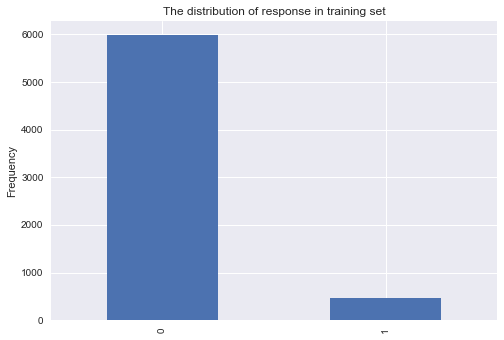

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
count = y_train.value_counts()
count.plot(kind = 'bar')
plt.title('The distribution of response in training set')
plt.ylabel('Frequency')
plt.show()

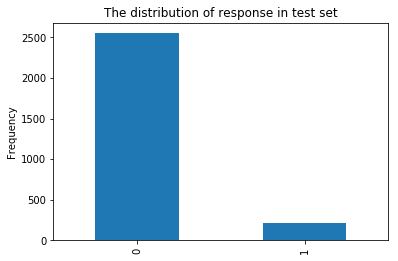

In [9]:
count = y_test.value_counts()
count.plot(kind = 'bar')
plt.title('The distribution of response in test set')
plt.ylabel('Frequency')
plt.show()

- 설명 자료의 분포

In [10]:
X_train.describe()

,AGE,INCOME,MARRIED,FICO,OWNHOME,BUY6,BUY12,BUY18,VALUE24,DISCBUY,...,LOC_E,LOC_F,LOC_G,LOC_H,ORGSRC_D,ORGSRC_I,ORGSRC_O,ORGSRC_P,ORGSRC_R,ORGSRC_U
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,...,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,44.625813,48.023241,0.584754,693.985590,0.336226,0.127208,0.209482,0.349706,254.663774,0.266811,...,0.227146,0.218934,0.096374,0.108770,0.188100,0.008522,0.207623,0.159901,0.127828,0.172916
std,10.267168,16.007342,0.492803,28.685499,0.472454,0.347349,0.437081,0.570969,155.243350,0.442327,...,0.419020,0.413556,0.295127,0.311374,0.390823,0.091927,0.405637,0.366542,0.333924,0.378204
min,18.000000,15.000000,0.000000,577.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,35.000000,0.000000,676.000000,0.000000,0.000000,0.000000,0.000000,149.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,50.000000,1.000000,695.000000,0.000000,0.000000,0.000000,0.000000,214.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,61.000000,1.000000,714.000000,1.000000,0.000000,0.000000,1.000000,310.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,114.000000,1.000000,793.000000,1.000000,2.000000,2.000000,3.000000,1238.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 로지스틱 회귀분석

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logreg = LogisticRegression(C = 1e10)    # 모형 구축
logreg.fit(X_train, y_train)            # 모형 적합

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
# 적합된 회귀 계수 결과
logreg.coef_

array([[ -3.56885664e-02,   4.54321301e-04,   5.77766000e-01,
         -1.89313796e-03,  -5.32278567e-01,  -2.09438321e-01,
         -2.61249813e-01,   7.07922357e-01,  -3.51958680e-06,
         -1.36274603e-01,   4.98088101e-02,   4.34999113e-02,
         -1.22100686e-01,  -1.67634900e-01,   2.67485376e-01,
          2.51299574e-01,  -2.68119061e-02,  -2.31784333e-01,
         -6.91569250e-02,  -4.77169006e-02,  -2.15972946e-01,
          4.58299033e-02,   4.33023265e-02,   1.81737881e-01,
         -5.29144461e-02,   6.09739782e-02]])

- ROC 곡선을 이용한 모형의 성능 확인.

Area under the ROC curve: 0.672202136124


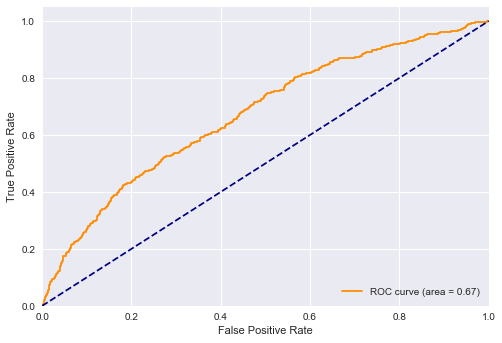

In [12]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
pred = logreg.predict_proba(X_train) # predicted probability
fpr, tpr, thresholds = roc_curve(y_train, pred[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve:", roc_auc)

plt.plot(fpr, tpr, color = "darkorange", label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', linestyle = '--')
plt.xlim([0,1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [13]:
# accuracy
y_pred = logreg.predict(X_train) # predicted class
accuracy_score(y_train, y_pred)

0.92624728850325377

In [14]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[5978,    0],
       [ 476,    0]])

# 2. Penalized regression
### Ridge regression (능형회귀)
- 조율모수 $C>0$에 대해, $-loglikelihood + \frac{1}{C} \sum_k \beta_k^2$을 최소화하는 $\beta$을 추정.

In [16]:
ridge_clf = LogisticRegression(penalty = 'l2',  C = 1.0, random_state = 42)
ridge_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
ridge_clf.coef_

array([[ -3.55046860e-02,   4.25918543e-04,   5.67789375e-01,
         -1.90324770e-03,  -5.23491686e-01,  -2.12144094e-01,
         -2.67074457e-01,   7.01745583e-01,   2.40541529e-05,
         -1.34112173e-01,   4.97111942e-02,   4.35472298e-02,
         -1.19940361e-01,  -1.69508059e-01,   2.67443691e-01,
          2.51438085e-01,  -2.76492479e-02,  -2.28720549e-01,
         -6.88281897e-02,  -4.75337037e-02,  -2.13103126e-01,
          4.62260139e-02,   4.24978008e-02,   1.80239187e-01,
         -5.29999441e-02,   6.06400668e-02]])

- 교차 검증법을 이용한 조율모수 $C$의 추정

In [19]:
C_can = np.concatenate((np.linspace(1e-5, 1, 50), np.linspace(1, 1e5, 50)))
ridge_cv = LogisticRegressionCV(penalty = 'l2', Cs = C_can, cv = 5,
                               random_state = 42)
### LogisticRegressionCV
ridge_cv.fit(X_train, y_train)
ridge_cv.C_

array([ 0.20408959])

In [20]:
ridge_clf = LogisticRegression(penalty = 'l2', C = ridge_cv.C_[0], random_state = 42)
ridge_clf.fit(X_train, y_train)

LogisticRegression(C=0.2040895918367347, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
# accuracy
y_pred = ridge_clf.predict(X_test) # predicted class
print('Accuracy:',accuracy_score(y_test, y_pred))
# confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_pred))

Accuracy: 0.92193711601
Confusion matrix 
 [[2551    0]
 [ 216    0]]


### Lasso Regression
- 조율모수 $C>0$에 대해, $-loglikelihood + \frac{1}{C} \sum_k |\beta_k|$을 최소화하는 $\beta$을 추정.

In [22]:
lasso_clf = LogisticRegression(penalty = 'l1',  C = 1.0, solver = 'liblinear',
                               random_state = 42)
lasso_clf.fit(X_train, y_train)
lasso_clf.coef_

array([[ -3.49676879e-02,   2.62488735e-06,   5.03880289e-01,
         -3.00951842e-03,  -4.76363257e-01,  -9.73630330e-02,
         -4.61415340e-01,   8.20022074e-01,  -1.41349526e-04,
         -1.18286351e-01,   3.28486711e-02,   2.67934185e-02,
         -1.08139676e-01,  -1.45845783e-01,   3.61796071e-01,
          3.44871853e-01,   0.00000000e+00,  -1.82165457e-01,
          0.00000000e+00,   0.00000000e+00,  -1.93151837e-01,
          2.07418112e-01,   2.21696831e-02,   1.62962647e-01,
         -4.24205908e-02,   4.43689614e-02]])

In [23]:
lasso_cv = LogisticRegressionCV(penalty = 'l1', Cs = C_can, cv = 5, solver = 'liblinear',
                                random_state = 42)
lasso_cv.fit(X_train, y_train)
lasso_cv.C_

array([ 0.30612939])

In [24]:
lasso_clf = LogisticRegression(penalty = 'l1', C = lasso_cv.C_[0], solver = 'liblinear',
                               random_state = 42)
lasso_clf.fit(X_train, y_train)

# accuracy
y_pred = lasso_clf.predict(X_test) # predicted class
print('Accuracy:',accuracy_score(y_test, y_pred))
# confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_pred))

Accuracy: 0.92193711601
Confusion matrix 
 [[2551    0]
 [ 216    0]]


In [25]:
lasso_clf.coef_

array([[ -3.37721481e-02,  -9.33389533e-05,   4.75579831e-01,
         -1.93531463e-03,  -4.44603401e-01,  -6.82055621e-02,
         -4.08579334e-01,   7.55236323e-01,  -2.70678873e-05,
         -8.70494288e-02,   0.00000000e+00,   0.00000000e+00,
         -8.01829890e-02,  -1.04183000e-01,   3.04702914e-01,
          2.85618872e-01,   0.00000000e+00,  -1.48019435e-01,
          0.00000000e+00,   0.00000000e+00,  -1.74248143e-01,
          0.00000000e+00,   0.00000000e+00,   1.16389926e-01,
         -1.44382338e-02,   0.00000000e+00]])

** * 알아서 절단값 확인* **
<br>

# 3. Ensemble

## Decision Trees
- if-then 으로 표현되는 규칙으로 생성되는 모형
- 장점: 좋은 해석력과 이상치에 둔감.
- 단점: 예측력이 떨어지고 분산이 커서 추정량이 안정적이지 않음.

### 의사 결정 나무 생성

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [27]:
# 학습자료에서의 예측
print('y label:', y_train.iloc[1])
print('predict class:', clf.predict(X_train[1:2]))
print('predict class probabilies:', clf.predict_proba(X_train[1:2]))

y label: 0
predict class: [0]
predict class probabilies: [[ 1.  0.]]


In [28]:
# 시험자료에서의 예측
print('y label:', y_test.iloc[1])
print('predict class:', clf.predict(X_test[1:2]))
print('predict class probabilies:', clf.predict_proba(X_test[1:2]))

y label: 0
predict class: [0]
predict class probabilies: [[ 1.  0.]]


In [29]:
# accuracy
y_pred = clf.predict(X_train) # predicted class
print('Accuracy:',accuracy_score(y_train, y_pred))
# confusion matrix
print('Confusion matrix \n',confusion_matrix(y_train, y_pred))# accuracy

Accuracy: 1.0
Confusion matrix 
 [[5978    0]
 [   0  476]]


상기 모델은 100% classification이 된 것으로 보아 CP가 높고 pruning이 안 된 것으로 보임

In [30]:
# accuracy
y_pred = clf.predict(X_test) # predicted class
print('Accuracy:',accuracy_score(y_test, y_pred))
# confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_pred))

Accuracy: 0.851825081316
Confusion matrix 
 [[2330  221]
 [ 189   27]]


## Bagging & Random Forest
- Bagging: Bootstrap을 이용하여 의사결정나무를 적합. $$\hat{f}_{bag}(X) = \frac{1}{B}\sum\limits_{b=1}^B \hat{f}_b^*(X)$$
- Random forest: Bagging와 흡사한 방식으로 적합하지만 전체 변수 ($p$ 개)을 사용하지 않고 $m \approx \sqrt{p}$ 또는 $m \approx \log_2 p$개의 변수를 랜덤하게 선택하여 이 변수들에서만 나무 모형을 적합.
- Bagging은 Random forest의 일종이기 때문에 같은 코드를 사용한다.

In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [32]:
bag_clf = RFC(n_estimators = 50, criterion = 'gini', random_state = 42,
             max_features = None)
# max_features = None일 때 bagging, 'auto'일 때 random forest
bag_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [33]:
rf_clf = RFC(n_estimators = 50, criterion = 'gini', random_state = 42,
             max_features = 'sqrt') # default option (auto)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

- 교차검증을 통한 나무 수 및 함수 옵션 정하기

In [34]:
from sklearn.model_selection import GridSearchCV
rf_cv_clf = RFC(random_state = 42) #Single 모델
param_grid = {'n_estimators': [300, 500, 700, 900, 1000], #tree 수
              'max_features': ['sqrt', 'log2', None] #bagging과 RF 동시에 비교
              }

grid_clf = GridSearchCV(rf_cv_clf, param_grid, cv = 5)
grid_clf.fit(X_train, y_train)
print('best params:', grid_clf.best_params_)
print('best score:', grid_clf.best_score_)

KeyboardInterrupt: 

In [34]:
rf_with_bestparams = RFC(random_state= 42,
                         max_features = grid_clf.best_params_['max_features'],
                         n_estimators = grid_clf.best_params_['n_estimators'])
rf_with_bestparams.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

- 변수의 중요도 평가

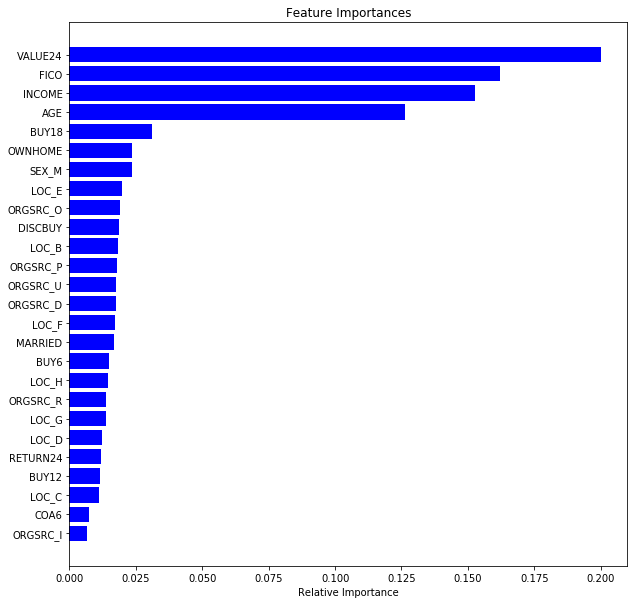

In [35]:
import matplotlib.pyplot as plt
importance = rf_with_bestparams.feature_importances_
indices = np.argsort(importance)

indices = indices[0:]
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
# train accuracy
y_pred = rf_with_bestparams.predict(X_train) # predicted class
print('Accuracy:',accuracy_score(y_train, y_pred))
# train confusion matrix
print('Confusion matrix \n',confusion_matrix(y_train, y_pred))

Accuracy: 1.0
Confusion matrix 
 [[5978    0]
 [   0  476]]


In [37]:
# test accuracy
y_pred = rf_with_bestparams.predict(X_test) # predicted class
print('Accuracy:',accuracy_score(y_test, y_pred))
# test confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_pred))

Accuracy: 0.922659920492
Confusion matrix 
 [[2547    4]
 [ 210    6]]


## Boosting

In [35]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth = 3, n_estimators = 300, learning_rate = 0.05, seed = 0).fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [39]:
?xgb.XGBClassifier

- 교차검증을 통한 나무수 및 함수옵션 정하기

In [40]:
gbm_cv_clf = xgb.XGBClassifier(seed=42)
gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 700, 900],
    'max_depth': [1, 2, 3, 4],
}

grid_clf = GridSearchCV(gbm_cv_clf, gbm_params, cv = 5)
grid_clf.fit(X_train, y_train)
print('best params:', grid_clf.best_params_)
print('best score:', grid_clf.best_score_)

best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
best score: 0.927951657887


In [41]:
gbm_with_bestparams = xgb.XGBClassifier(max_depth = grid_clf.best_params_['max_depth'],
                                        n_estimators = grid_clf.best_params_['n_estimators'],
                                        learning_rate = grid_clf.best_params_['learning_rate'],
                                        seed = 0)
gbm_with_bestparams.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

- 변수 중요도 평가

In [42]:
# feature importance
print(gbm_with_bestparams.feature_importances_)

[ 0.1698821   0.17470525  0.02143623  0.17041801  0.02197213  0.01125402
  0.01446945  0.04126474  0.20525187  0.00803859  0.00428725  0.00160772
  0.01714898  0.01393355  0.01714898  0.0096463   0.02679528  0.01822079
  0.00321543  0.01446945  0.00750268  0.00428725  0.00428725  0.0096463
  0.00214362  0.00696677]


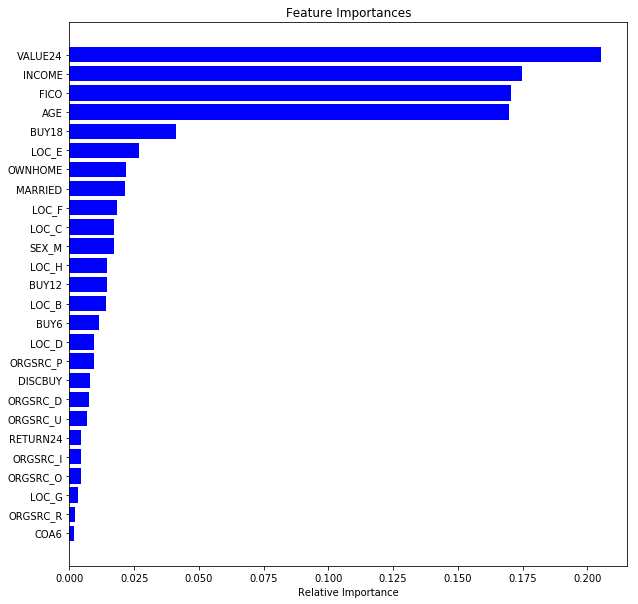

In [43]:
importance = gbm_with_bestparams.feature_importances_
indices = np.argsort(importance)

indices = indices[0:]
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

In [44]:
# train accuracy
y_pred = gbm_with_bestparams.predict(X_train) # predicted class
print('Accuracy:',accuracy_score(y_train, y_pred))
# train confusion matrix
print('Confusion matrix \n',confusion_matrix(y_train, y_pred))

Accuracy: 0.933994422064
Confusion matrix 
 [[5978    0]
 [ 426   50]]


In [45]:
# test accuracy
y_pred = gbm_with_bestparams.predict(X_test) # predicted class
print('Accuracy:',accuracy_score(y_test, y_pred))
# test confusion matrix
print('Confusion matrix \n',confusion_matrix(y_test, y_pred))

Accuracy: 0.921575713769
Confusion matrix 
 [[2548    3]
 [ 214    2]]


# 모형별 비교
## 1. ROC & AUC

In [46]:
def get_roc_curve(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve:", roc_auc)

    plt.plot(fpr, tpr, color = "darkorange", label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], color = 'navy', linestyle = '--')
    plt.xlim([0,1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve: 0.624580774424


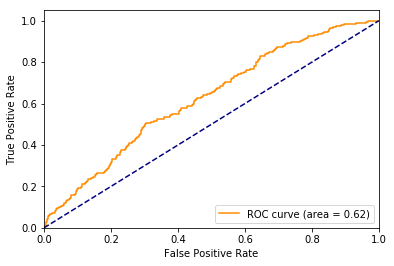

In [47]:
get_roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

Area under the ROC curve: 0.627747651611


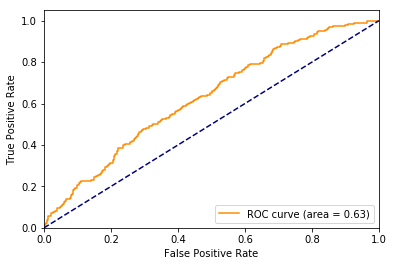

In [48]:
get_roc_curve(y_test, ridge_clf.predict_proba(X_test)[:, 1])

Area under the ROC curve: 0.631567867358


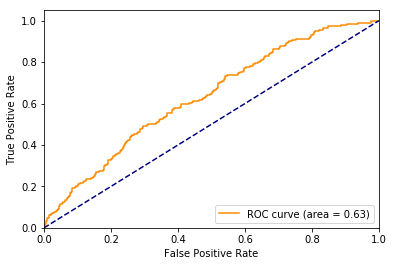

In [49]:
get_roc_curve(y_test, lasso_clf.predict_proba(X_test)[:, 1])

Area under the ROC curve: 0.616646340578


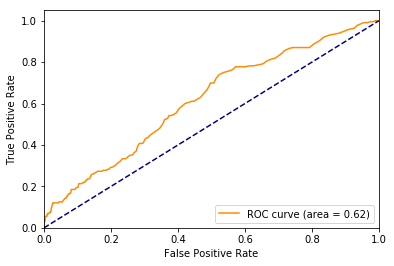

In [50]:
get_roc_curve(y_test, rf_with_bestparams.predict_proba(X_test)[:, 1])

Area under the ROC curve: 0.630404561755


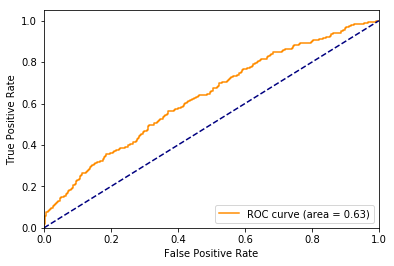

In [51]:
get_roc_curve(y_test, gbm_with_bestparams.predict_proba(X_test)[:, 1])

## 2. Precision-Recall curve

Average precision-recall score: 0.12


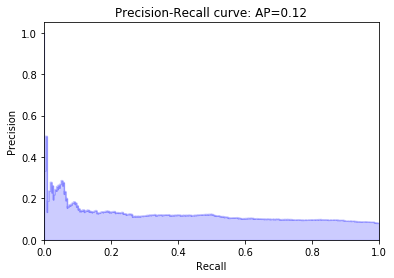

In [52]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred = logreg.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [53]:
def get_pr_curve(y, y_pred):
    average_precision = average_precision_score(y, y_pred)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))

    precision, recall, _ = precision_recall_curve(y, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

Average precision-recall score: 0.12


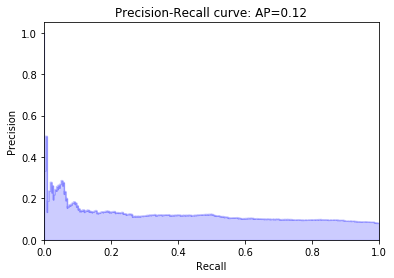

In [54]:
get_pr_curve(y_test, logreg.predict_proba(X_test)[:, 1])

Average precision-recall score: 0.16


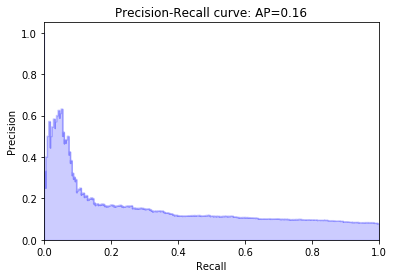

In [55]:
get_pr_curve(y_test, gbm_with_bestparams.predict_proba(X_test)[:, 1])